In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [17]:
ds=pd.read_csv('adult.data', header = None)

In [18]:
ds.dropna(inplace=True)

In [19]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
ds.columns = col_labels

In [20]:
ds.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [21]:
ds['wage_class']=ds.wage_class.map({' <=50K':0, ' >50K':1})
ds['wage_class'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: wage_class, dtype: int64

In [22]:
# Choosing subsets of columns
X=ds[['age','hours_per_week','education_num','capital_loss']]
y=ds['wage_class']

In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

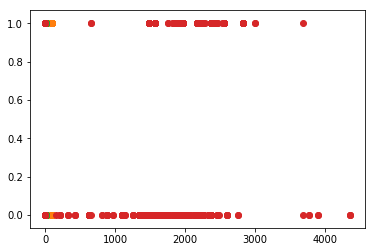

In [25]:
# Data visualisation

plt.scatter(ds['age'],ds['wage_class'])
plt.scatter(ds['hours_per_week'],ds['wage_class'])
plt.scatter(ds['education_num'],ds['wage_class'])
plt.scatter(ds['capital_loss'],ds['wage_class'])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

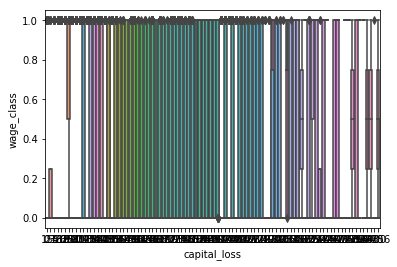

In [27]:
import seaborn as sns
sns.boxplot(x=ds['age'],y=ds['wage_class'])
sns.boxplot(x=ds['hours_per_week'],y=ds['wage_class'])
sns.boxplot(x=ds['education_num'],y=ds['wage_class'])
sns.boxplot(x=ds['capital_loss'],y=ds['wage_class'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
print(lm.intercept_)
print(lm.coef_)

-0.7439821611596626
[0.00644877 0.00575396 0.0489535  0.00011257]


In [31]:
model2 = sm.OLS(y_train, X_train).fit() 
prediction2 = model2.predict(X_test)

In [32]:
prediction2

6003     0.220819
29695    0.330669
23152    0.235084
22137    0.265061
11571    0.137047
29914    0.287098
32309    0.187922
16657    0.340338
26680    0.233858
28810    0.292175
18266    0.278879
11852    0.336782
15569    0.218781
26010    0.298256
12496    0.220819
24008    0.345675
26910    0.206555
32166    0.299360
4667     0.167284
17462    0.272264
22911    0.282808
25180    0.222857
5357     0.220890
12216    0.325817
7008     0.324566
19457    0.267689
29165    0.235074
30195    0.237898
10400    0.207367
24466    0.209629
           ...   
10875    0.318147
20091    0.213490
12256    0.263167
7712     0.243235
6613     0.145781
15974    0.303401
13157    0.243270
9962     0.327784
10227    0.276980
5767     0.276617
29728    0.285060
19377    0.216744
13642    0.240973
17237    0.279916
1393     0.198403
10789    0.244012
30516    0.217003
29942    0.368053
4965     0.323779
99       0.224895
8078     0.231785
26719    0.212668
6851     0.245202
25318    0.237898
4354     0

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             wage_class   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     3066.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        12:03:17   Log-Likelihood:                -13475.
No. Observations:               26048   AIC:                         2.696e+04
Df Residuals:                   26044   BIC:                         2.699e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0020      0.000     12.321      0.000       0.002       0.002
hours_per_week     0.0006      0.000      3.317      0.001       0.000       0.001
education_num      0.0150      0.001     19.339      0.000       0.014       0.017
capital_loss       0.0001   6.25e-06     22.198      0.000       0.000       0.000
==============================================================================
Omnibus:                     4259.227   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6172.830
Skew:                           1.171   Prob(JB):                         0.00
Kurtosis:                       2.549   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
import statsmodels.formula.api as smf


In [41]:
lm1 = smf.ols(formula='X~y', data=ds).fit()

In [44]:
lm1

In [48]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, prediction2))
print(metrics.mean_squared_error(y_test, prediction2))
print(np.sqrt(metrics.mean_squared_error(y_test, prediction2)))

0.3520605599539455
0.16290868612439124
0.40361948184446106


In [50]:
residual=y_test=prediction2

In [ ]:
# Assumptions Check

In [51]:
# Shapiro-Wilk Test

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# normality test
stat,p = shapiro(residual)
alpha = 0.10
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)') # null hypothesis is  normal;
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Null hypothesis(H0): Person does not make above 50k
# H1: Person does make above 50k